In [10]:
#### Cargamos los paquetes ####

using RCall
using LightGraphs
using GraphPlot
using Colors
using Clustering

INFO: Precompiling module Distances.


In [5]:
"""
    community_detection_bethe(g::Graph, k=-1; kmax=15)
Community detection using the spectral properties of
the Bethe Hessian matrix associated to `g` (see [Saade et al.](http://papers.nips.cc/paper/5520-spectral-clustering-of-graphs-with-the-bethe-hessian)).
`k` is the number of community to detect. If omitted or if `k<1` the
optimal number of communities will be automatically selected.
In this case the maximum number of detectable communities is given by `kmax`.
Returns a vector containing the vertex assignments.
"""
function community_detection_bethe(g::Graph, k::Int=-1; kmax::Int=15)
    A = adjacency_matrix(g)
    D = diagm(degree(g))
    r = (sum(degree(g)) / nv(g))^0.5
    Hr = (r^2-1)*eye(nv(g))-r*A+D;
    # Hmr = (r^2-1)*eye(nv(g))+r*A+D;
    k >= 1 && (kmax = k)
    λ, eigv = eigs(Hr, which=:SR, nev=min(kmax, nv(g)))
    q = findlast(x -> x<0, λ)
    k > q && warn("Using eigenvectors with positive eigenvalues,
                    some communities could be meaningless. Try to reduce `k`.")
    k < 1 && (k = q)
    k < 1 && return fill(1, nv(g))
    labels = kmeans(eigv[:,2:k]', k).assignments
    return labels
end


community_detection_bethe

In [3]:
##### Para cargar la red ####

red = readdlm("zacharykarateclub.dat")
g = Graph()
ultimovertice = Int64(maximum(red))
add_vertices!(g,ultimovertice)
for n in 1:Int64((length(red)/2))
    add_edge!(g,Int64(red[n,1]),Int64(red[n,2]))
end

In [13]:
membership = community_detection_bethe(g)

34-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 2
 2
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

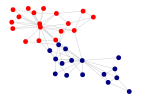

In [15]:
nodecolor = [colorant"navy", colorant"red"]
nodefillc = nodecolor[membership]
gplot(g, nodefillc=nodefillc)

In [16]:
##### Para cargar la red ####

red = readdlm("dolphins.dat")
g = Graph()
ultimovertice = Int64(maximum(red))
add_vertices!(g,ultimovertice)
for n in 1:Int64((length(red)/2))
    add_edge!(g,Int64(red[n,1]),Int64(red[n,2]))
end

In [29]:
membership = community_detection_bethe(g)

115-element Array{Int64,1}:
  7
  5
  1
 10
  7
 10
  1
  2
  2
  7
 10
 10
  4
  ⋮
  5
  7
  5
  1
 10
  2
  5
  8
  2
  6
  3
  8

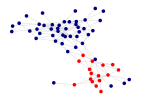

In [17]:
nodecolor = [colorant"navy", colorant"red"]
nodefillc = nodecolor[membership]
gplot(g, nodefillc=nodefillc)

In [18]:
##### Para cargar la red ####

red = readdlm("football.dat")
g = Graph()
ultimovertice = Int64(maximum(red))
add_vertices!(g,ultimovertice)
for n in 1:Int64((length(red)/2))
    add_edge!(g,Int64(red[n,1]),Int64(red[n,2]))
end

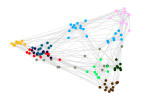

In [21]:
membership = community_detection_bethe(g)
nodecolor = collect(distinguishable_colors(n,colorant"red"))
nodefillc = nodecolor[membership]
gplot(g, nodefillc=nodefillc,layout=spectral_layout)

In [28]:
sort(unique(membership))

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10